Este cuaderno explica la implementacion de los distintos tipos de modelos de aprendizaje supervisado. Es decir, redes neuronales, arboles de decisiones, bosques de decision, regresion lineal y svm.

In [40]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Cargar el conjunto de datos
data = fetch_california_housing(as_frame=True)
df = data.frame

# Mostrar las primeras filas del dataset
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [41]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [43]:
df.duplicated().sum()

np.int64(0)

<Axes: >

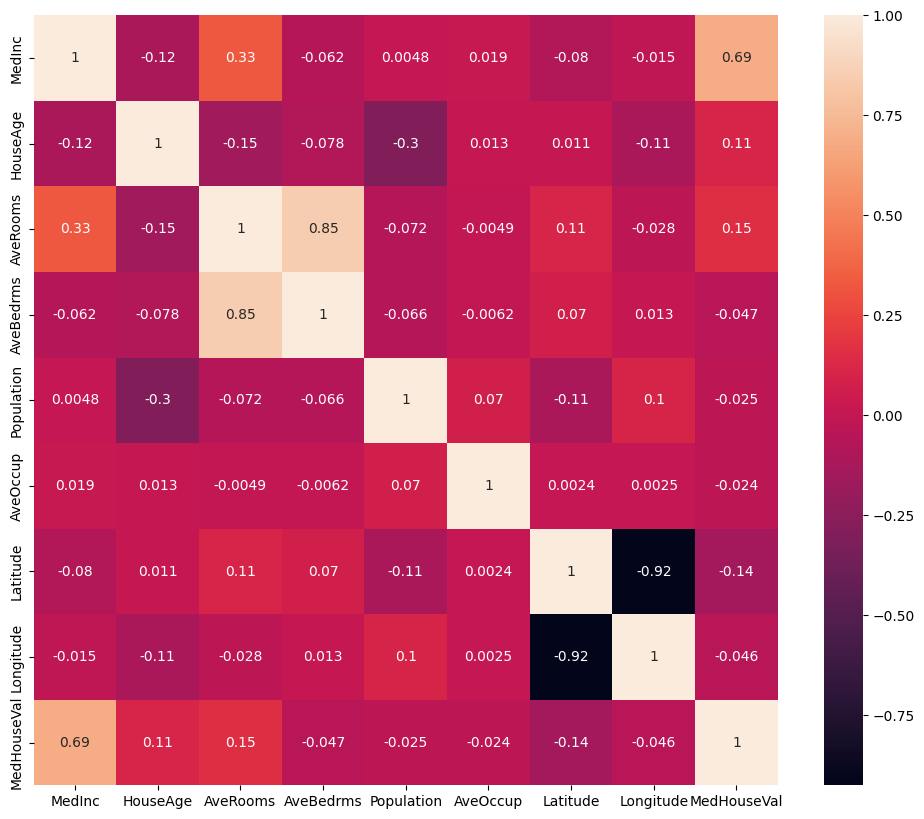

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(method='pearson'),annot=True)

In [45]:
from sklearn.model_selection import train_test_split

# Definir las características (X) y la variable objetivo (y)
X = df.drop('MedHouseVal', axis=1)  # Eliminar la columna objetivo
y = df['MedHouseVal']  # Columna objetivo

# Dividir los datos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Entrenamiento del modelo

In [46]:
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal
model_lr = LinearRegression() #creacion de un modelo vacio para RL
model_lr.fit(X_train, y_train) #calculo de pendientes para cada caracteristica de X_train, relacion entre variable dependiente e independiente.
#ajusta los coeficientes para minimizar la suma de los errores cuadraticos entre el modelo de entrenamiento y los valores reales.

LinearRegression()

In [47]:
"""
from sklearn.svm import SVR
#se suele emplear tanto en regresion como clasificacion

# Crear el modelo SVM para regresión
model_svr = SVR(kernel='linear') #esto del kernel es el tipo de funcion que intentara ajustar a los datos, en este caso lineal, podria usarse polinomico o radial tambien.
model_svr.fit(X_train, y_train)
#aca no se minimiza el error sino que se 

"""

"\nfrom sklearn.svm import SVR\n\n# Crear el modelo SVM para regresión\nmodel_svr = SVR(kernel='linear')\nmodel_svr.fit(X_train, y_train)\n"

In [48]:
from sklearn.tree import DecisionTreeRegressor

# Crear el modelo de árbol de decisión
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)


DecisionTreeRegressor()

In [49]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo de bosque aleatorio
model_rf = RandomForestRegressor(n_estimators=100)
model_rf.fit(X_train, y_train)


RandomForestRegressor()

In [50]:
from sklearn.neural_network import MLPRegressor

# Crear el modelo de red neuronal
model_nn = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)
model_nn.fit(X_train, y_train)


MLPRegressor(max_iter=1000)

## Evaluacion con R^2

In [51]:
from sklearn.metrics import r2_score

# Hacer predicciones con cada modelo
predictions_lr = model_lr.predict(X_test)
#predictions_svr = model_svr.predict(X_test)
predictions_dt = model_dt.predict(X_test)
predictions_rf = model_rf.predict(X_test)
predictions_nn = model_nn.predict(X_test)

# Calcular el R^2 score para cada modelo
r2_lr = r2_score(y_test, predictions_lr)
#r2_svr = r2_score(y_test, predictions_svr)
r2_dt = r2_score(y_test, predictions_dt)
r2_rf = r2_score(y_test, predictions_rf)
r2_nn = r2_score(y_test, predictions_nn)

print(f'R^2 Score - Regresión Lineal: {r2_lr}')
#print(f'R^2 Score - SVM: {r2_svr}')
print(f'R^2 Score - Árbol de Decisión: {r2_dt}')
print(f'R^2 Score - Bosque Aleatorio: {r2_rf}')
print(f'R^2 Score - Red Neuronal: {r2_nn}')


R^2 Score - Regresión Lineal: 0.5757877060324511
R^2 Score - Árbol de Decisión: 0.6109258645242194
R^2 Score - Bosque Aleatorio: 0.8058967648588768
R^2 Score - Red Neuronal: 0.5069465681901617


## Predicciones

In [52]:
# Hacer predicciones sobre el conjunto de prueba
predictions = model_lr.predict(X_test)

# Mostrar las primeras predicciones
print(predictions[:5])  # Imprimir las primeras 5 predicciones


[0.71912284 1.76401657 2.70965883 2.83892593 2.60465725]


In [53]:
import numpy as np

# Comparar las predicciones con los valores reales
comparison = pd.DataFrame({'Real': y_test, 'Predicción': predictions})
print(comparison.head(10))  # Mostrar las primeras 10 comparaciones


          Real  Predicción
20046  0.47700    0.719123
3024   0.45800    1.764017
15663  5.00001    2.709659
20484  2.18600    2.838926
9814   2.78000    2.604657
13311  1.58700    2.011754
7113   1.98200    2.645500
7668   1.57500    2.168755
18246  3.40000    2.740746
5723   4.46600    3.915615


In [54]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Error Cuadrático Medio: {mse}')
print(f'R^2 Score: {r2}')


Error Cuadrático Medio: 0.555891598695244
R^2 Score: 0.5757877060324511
